In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np


In [3]:
weather = pd.read_excel('/content/drive/My Drive/LCD_sample_data.xlsx')
print(weather)
median1 = weather["dry_bulb"].median()
weather["dry_bulb"].fillna(median1,inplace = True)
median2 = weather["wet_bulb"].median()
weather["wet_bulb"].fillna(median2,inplace = True)
median3 = weather["Rel_Hum"].median()
weather["Rel_Hum"].fillna(median3,inplace = True)
median4 = weather["dew_point"].median()
weather["dew_point"].fillna(median4,inplace = True)
median5 = weather["Station_Press"].median()
weather["Station_Press"].fillna(median5,inplace = True)

      dry_bulb  wet_bulb  dew_point  Rel_Hum  Station_Press
0          6.7       3.9        0.0     63.0          27.78
1          6.7       3.9        0.0     63.0          27.75
2          5.6       3.7        1.7     76.0          27.78
3          5.6       4.0        2.2     79.0          27.79
4          5.6       4.4        3.3     85.0          27.79
...        ...       ...        ...      ...            ...
3086      16.7      12.3        7.2     54.0          27.91
3087      15.0      11.4        7.8     62.0          27.92
3088      15.0      11.4        7.8     62.0          27.92
3089      13.3      10.4        7.8     70.0          27.90
3090      13.3      10.4        7.8     70.0          27.90

[3091 rows x 5 columns]


In [ ]:
#x=[weather["dry_bulb"],weather["wet_bulb"],weather["dew_point"],weather["Rel_Hum"]]
#y=[weather["Station_Press"]]

In [4]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(weather,test_size = 0.2)

In [5]:
x=[Train["dry_bulb"],Train["wet_bulb"],Train["dew_point"],Train["Rel_Hum"]]
y=[Train["Station_Press"]]
X=[Test["dry_bulb"],Test["wet_bulb"],Test["dew_point"],Test["Rel_Hum"]]
Y=[Test["Station_Press"]]
print(x)
print(y)

[1837    3.3
1764    8.9
2569    3.3
1601   -3.9
2940    6.7
       ... 
1767    6.1
408     4.4
1814    8.9
1591    1.7
1389   -5.6
Name: dry_bulb, Length: 2472, dtype: float64, 1837    0.8
1764    4.9
2569    0.5
1601   -6.1
2940    5.3
       ... 
1767    2.5
408     2.5
1814    4.9
1591   -1.5
1389   -7.8
Name: wet_bulb, Length: 2472, dtype: float64, 1837    -3.3
1764    -4.4
2569    -5.0
1601   -12.2
2940     3.9
        ... 
1767    -6.1
408      0.0
1814    -5.6
1591   -11.7
1389   -15.6
Name: dew_point, Length: 2472, dtype: float64, 1837    62.0
1764    39.0
2569    55.0
1601    53.0
2940    83.0
        ... 
1767    42.0
408     73.0
1814    36.0
1591    37.0
1389    46.0
Name: Rel_Hum, Length: 2472, dtype: float64]
[1837    27.71
1764    27.39
2569    27.92
1601    27.98
2940    27.75
        ...  
1767    27.45
408     28.02
1814    27.74
1591    27.86
1389    28.07
Name: Station_Press, Length: 2472, dtype: float64]


In [6]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler() 
x = Scaler.fit_transform(x) 
X = Scaler.fit_transform(X) 
print(x)
#print(X.shape)
y=np.array(y)
Y=np.array(Y)
print(y)
print(Y.shape)
#print(x.size)
#print(y.size)
x=np.transpose(x)
X=np.transpose(X)
y=np.transpose(y)
Y=np.transpose(Y)

[[-0.46208381 -0.19676573 -0.41987251 ... -0.14008893 -0.25461933
  -0.40386918]
 [-0.55524587 -0.44272289 -0.53569941 ... -0.4007195  -0.42890422
  -0.49407346]
 [-0.70803165 -1.01457328 -0.76321653 ... -1.08487474 -0.9844373
  -0.81388865]
 [ 1.72536134  1.65406189  1.71878845 ...  1.62568317  1.66796084
   1.71183129]]
[[27.71 27.39 27.92 ... 27.74 27.86 28.07]]
(1, 619)


Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 775.3843 - val_loss: 773.3131
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 771.3933 - val_loss: 769.7485
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 768.4205 - val_loss: 767.3507
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 765.9226 - val_loss: 764.5654
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 762.7889 - val_loss: 760.9497
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 758.6350 - val_loss: 756.1204
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 753.0801 - val_loss: 749.6628
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 745.7268 - val_loss: 741.2456
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 736.3071 - val_loss: 730.6199
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss:

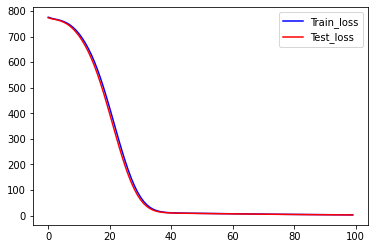

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
model = keras.Sequential([
        keras.layers.Dense(5,activation='relu',input_shape=[4]),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1)])

model.compile(loss='mean_squared_error',optimizer='Adam')
history=model.fit(x,y,batch_size = 100,epochs=100,validation_data=(X,Y))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,'blue', label='Train_loss')
plt.plot(val_loss,'red', label='Test_loss')
plt.legend()
plt.show()


Epoch 1/100
5/5 [==============================] - 1s 39ms/step - loss: 745.7137 - val_loss: 745.7537
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 745.5591 - val_loss: 745.6047
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 745.4135 - val_loss: 745.4658
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 745.2770 - val_loss: 745.3400
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 745.1512 - val_loss: 745.2230
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 745.0328 - val_loss: 745.1102
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 744.9175 - val_loss: 745.0052
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 744.8091 - val_loss: 744.9033
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 744.7050 - val_loss: 744.8046
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 744.6038 - val_lo

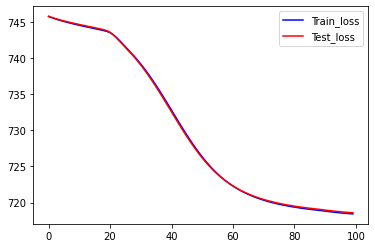

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
model = keras.Sequential([
        keras.layers.Dense(5,activation='relu',input_shape=[4]),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')])

model.compile(loss='mean_squared_error',optimizer='Adam')
history=model.fit(x,y,batch_size = 100,epochs=100,validation_data=(X,Y))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,'blue', label='Train_loss')
plt.plot(val_loss,'red', label='Test_loss')
plt.legend()
plt.show()
